In [1]:
from seqdata import getset
import sys
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
import numpy
import random

In [2]:
X,y=getset(7)

#X=numpy.array([i for i,j in zip(X,y) if j in (0,12)])
#y=numpy.array([{0:0,12:1}[i] for i in y if i in (0,12)])
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1234567, shuffle=True)

#resample X_train and y_train
n=1000
random.seed(1234567)
new_X,new_y=[],[]
for cat in range(20):
    cat_xy=[(x,lab) for x,lab in zip(X_train,y_train) if lab==cat]
    qs=[random.choice(cat_xy) for ii in range(n)]
    xs=[q[0] for q in qs]
    ys=[q[1] for q in qs]
    new_X.extend(xs)
    new_y.extend(ys)
X_train=numpy.array(new_X)
y_train=numpy.array(new_y)

In [3]:
print(X_train.shape,X_test.shape)
print(X_train[0].reshape(7,23))
print(sys.getsizeof(X_train))


(20000, 161) (38829, 161)
[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0]]
12880128


In [349]:
#from sklearn.neighbors import KNeighborsClassifier
#model=KNeighborsClassifier(n_neighbors=100, metric='minkowski')
#model.fit(X_train, y_train)
#print (model.score(X_test[:1000], y_test[:1000]))

In [350]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(min_samples_split=2, max_depth=100)
model.fit(X_train, y_train)
print (model.score(X_test, y_test))

0.08331401787323907


In [26]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=1000, max_depth=20,class_weight='balanced')
model.fit(X_train, y_train)
print (model.score(X_test, y_test))

0.126786680058719


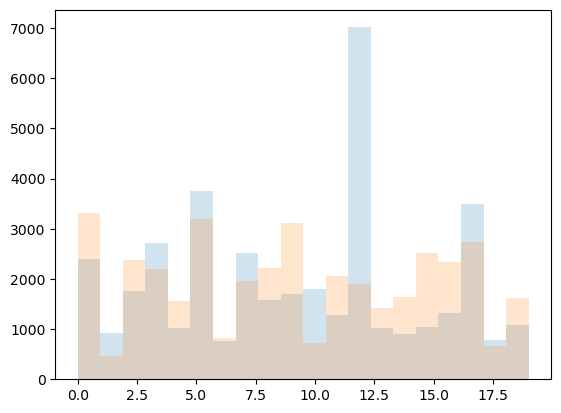

In [27]:
y_pred=model.predict(X_test)
plt.hist(y_pred, bins=20,alpha=0.2)
plt.hist(y_test, bins=20,alpha=0.2)
plt.show()

In [353]:
from torch import Tensor
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch.nn import Linear
from torch.nn import ReLU, LeakyReLU,ELU
from torch.nn import Softmax
from torch.nn import Module
from torch.optim import SGD,Adam
from torch.nn import CrossEntropyLoss
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_, uniform_, ones_
from numpy import argmax, vstack
from sklearn.metrics import accuracy_score

In [354]:
train=[[numpy.array(x, dtype=numpy.float32),y] for x,y in zip(X_train,numpy.array(y_train,dtype=numpy.int64))]
print(train[0])
test=[[numpy.array(x,dtype=numpy.float32),y] for x,y in zip(X_test,numpy.array(y_test,dtype=numpy.int64))]
train_dl = DataLoader(train, batch_size=10, shuffle=True)
test_dl = DataLoader(test, batch_size=1000, shuffle=False)
print(train_dl)
print(test_dl)

[array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32), 0]


In [355]:
class MLP(Module):
    # define model elements
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        N=161 #2*161
        
        self.hidden1 = Linear(n_inputs, N)
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        #uniform_(self.hidden1.weight)
        #ones_(self.hidden1.weight)
        self.act1 = LeakyReLU()

        #self.hidden2 = Linear(N, N)
        #kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        #uniform_(self.hidden2.weight)
        #self.act2 = LeakyReLU()
 
        #self.hidden3 = Linear(N, N)
        #kaiming_uniform_(self.hidden3.weight, nonlinearity='relu')
        #uniform_(self.hidden3.weight)
        #self.act3 = LeakyReLU()
        
        #self.hidden4 = Linear(N, N)
        #kaiming_uniform_(self.hidden4.weight)
        #self.act4 = ReLU()
 

        self.hidden_last = Linear(N, 20)   
        #kaiming_uniform_(self.hidden_last.weight)        
        #xavier_uniform_(self.hidden_last.weight)
        #uniform_(self.hidden_last.weight)
        ones_(self.hidden_last.weight)
        self.act_last = Softmax(dim=1)
    # forward propagate input
    def forward(self, X):
        # input to first hidden layer
        X = self.hidden1(X)
        X = self.act1(X)
        #second 
        #X = self.hidden2(X)
        #X = self.act2(X)
        #third
        #X = self.hidden3(X)
        #X = self.act3(X)
        #fourth
        #X = self.hidden4(X)
        #X = self.act4(X)        
        # output layer
        X = self.hidden_last(X)
        X = self.act_last(X)
        return X

In [356]:

#whs=[len(y_train)/list(y_train).count(i) for i in range(numpy.max(y_train)+1)]
#whs=numpy.array(whs)/sum(whs)
#whs=Tensor(whs)
#print(whs)

def train_model(train_dl, model):
    # define the optimization
    criterion = CrossEntropyLoss() #weight=whs)
    #optimizer = Adam(model.parameters(),lr=0.01)
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    # enumerate epochs
    for epoch in range(100):
        # enumerate mini batches
        losses=[]
        for i, (inputs, targets) in enumerate(train_dl):
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # calculate loss
            loss = criterion(yhat, targets)
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()
            losses.append(loss.detach().numpy())
        print(epoch, numpy.mean(losses))
 

In [357]:
# evaluate the model
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        # convert to class labels
        yhat = argmax(yhat, axis=1)
        # reshape for stacking
        actual = actual.reshape((len(actual), 1))
        yhat = yhat.reshape((len(yhat), 1))
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    # calculate accuracy
    acc = accuracy_score(actuals, predictions)
    plt.hist(predictions, bins=20,alpha=0.2)
    plt.hist(actuals, bins=20,alpha=0.2)
    plt.show()
    return acc

In [358]:
def predict(row, model):
    # convert row to data
    row = Tensor([row])
    # make prediction
    yhat = model(row)
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    return yhat

0 2.9948528
1 2.9903197
2 2.981415
3 2.9732363
4 2.9690337
5 2.9654834
6 2.963091
7 2.9603157
8 2.958041
9 2.9552574
10 2.9531293
11 2.9509063
12 2.9483383
13 2.9466417
14 2.944167
15 2.942127
16 2.939829
17 2.9376342
18 2.9347947
19 2.9332619
20 2.9308283
21 2.9282339
22 2.9258144
23 2.9235616
24 2.9208982
25 2.9182081
26 2.9157999
27 2.9131095
28 2.9101596
29 2.9076216
30 2.9052172
31 2.9022253
32 2.9000149
33 2.8971872
34 2.8946068
35 2.8921652
36 2.889541
37 2.886697
38 2.8846703
39 2.8822045
40 2.8802662
41 2.8776472
42 2.875852
43 2.8733413
44 2.871187
45 2.8689995
46 2.8670518
47 2.8648002
48 2.862649
49 2.8603687
50 2.8582988
51 2.8561573
52 2.854254
53 2.852428
54 2.8502388
55 2.8486116
56 2.846852
57 2.8448086
58 2.8434176
59 2.8416414
60 2.8397548
61 2.8383644
62 2.8369477
63 2.8353193
64 2.8336804
65 2.8324952
66 2.8308702
67 2.8294766
68 2.8279138
69 2.8267617
70 2.8252695
71 2.8241885
72 2.8227491
73 2.8214483
74 2.8203192
75 2.8190908
76 2.817778
77 2.8164804
78 2.815563

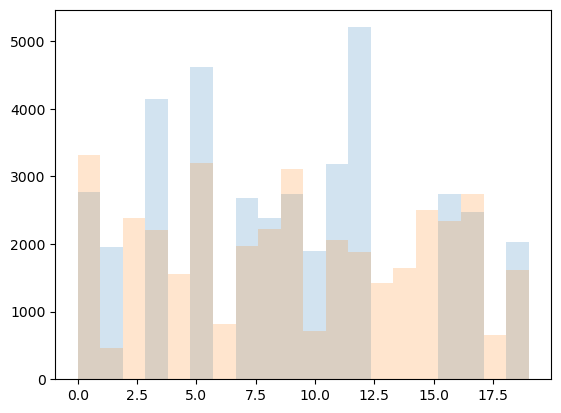

Accuracy: 0.111


In [359]:
model=MLP(161)
train_model(train_dl, model)
acc = evaluate_model(test_dl, model)
print('Accuracy: %.3f' % acc)

25921
161
3220
20


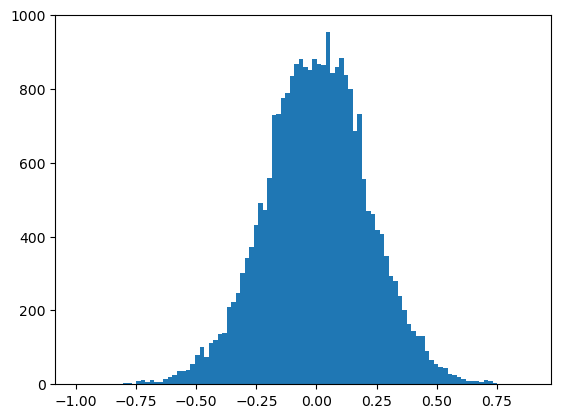

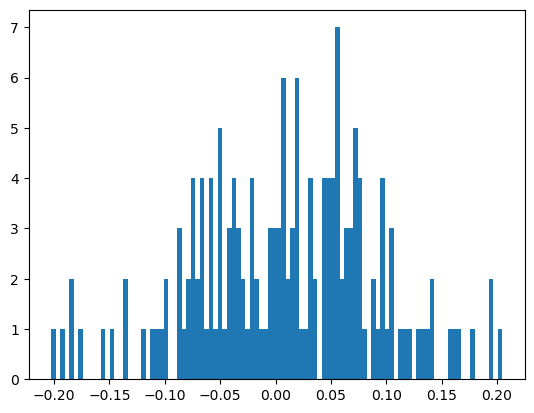

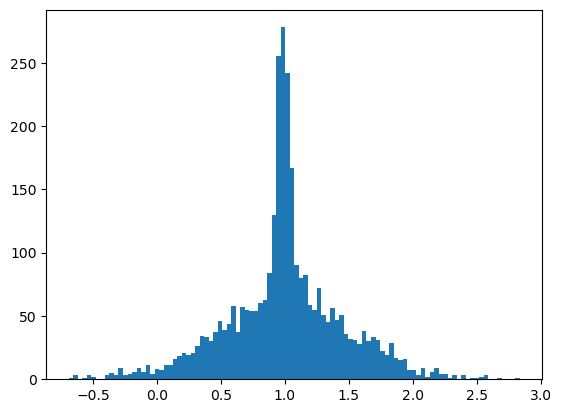

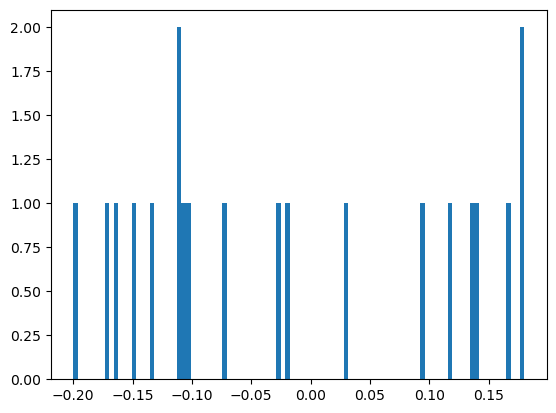

In [329]:
#print(numpy.mean(X_train,axis=0))
#print(list(model.parameters()))
for p in model.parameters():
    q=p.detach().numpy().flatten()
    print(q.size)
    plt.figure()
    plt.hist(q, bins=100)

In [343]:
for var_name in model.state_dict():
    print(var_name, "\t", model.state_dict()[var_name])

hidden1.weight 	 tensor([[-0.1862, -0.3241,  0.2772,  ...,  0.1355, -0.0927, -0.2117],
        [-0.0830,  0.1971,  0.0014,  ...,  0.1118, -0.0682,  0.0435],
        [-0.0202,  0.2260, -0.0802,  ...,  0.0595, -0.0174, -0.1205],
        ...,
        [-0.0858,  0.1877, -0.1632,  ...,  0.0471, -0.1354,  0.1666],
        [-0.0585, -0.0408, -0.1576,  ...,  0.1105,  0.0941,  0.0408],
        [-0.0393, -0.1489,  0.0027,  ...,  0.0176,  0.1282,  0.2490]])
hidden1.bias 	 tensor([-6.4569e-02,  5.3913e-02,  9.2571e-02,  9.5153e-02,  1.3842e-01,
        -8.3031e-02,  4.6914e-02, -8.4343e-02,  4.5406e-02,  1.2749e-01,
        -7.5518e-02, -6.0808e-02,  1.1038e-01, -3.0670e-02,  7.4413e-02,
        -9.5518e-03, -7.5292e-02, -1.3557e-02,  1.4848e-01, -1.4145e-03,
         1.4962e-02,  8.6102e-02,  9.3015e-03, -1.0959e-01, -6.7141e-02,
        -2.9968e-02,  9.2026e-03, -3.8817e-03, -3.2131e-04, -9.9586e-02,
        -9.8634e-02, -1.6032e-01,  3.7555e-02,  1.2043e-01,  1.5070e-01,
        -8.6963e-02, -4